# Hand-written digits recognition


1. Perform ICA on images to extract features
2. train a supervised classifier (thanks to these features) to recognize numbers

# load an image

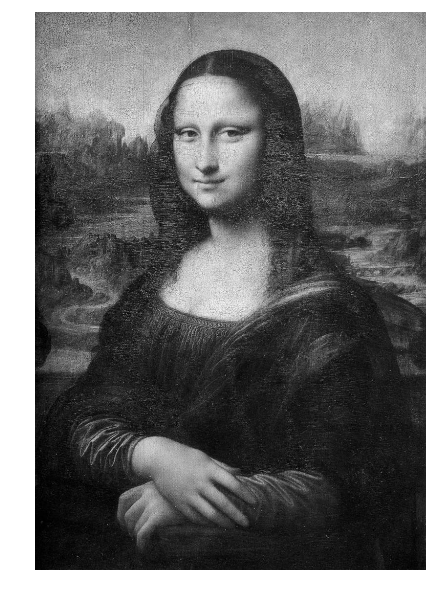

ratio 1.42875
<type 'float'>


In [37]:
import idx2numpy
import scipy
from scipy import ndimage
from scipy import misc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from pylab import rcParams
from bokeh.plotting import figure, show, output_file
rcParams['figure.figsize'] = 15, 10
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from PIL import Image
from StringIO import StringIO
import base64
import pprint
from sklearn.decomposition import RandomizedPCA
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split


def loadImageToMatrix(path):
    return scipy.misc.imread(path)
    
    
I = loadImageToMatrix('MonaLisaBW.jpg')

plt.imshow(I, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

ratio = float( I.shape[0]) / float( I.shape[1])
print "ratio %s"%ratio
print type(ratio)

# transform to patches

In [38]:
def getVectorPatches( I, size_patche = 10 ):
    
    #patches
    patches = []
    for i in np.arange(0,I.shape[0]-size_patche, size_patche):
        for j in np.arange(0,I.shape[1]-size_patche, size_patche): 
            A = I[ i:i+size_patche , j:j+size_patche]
            patches.append(A)
    # vectorize patches
    vector_patches = []
    for p in patches:
        vector_patches.append( p.reshape(1,size_patche*size_patche) )
    return np.vstack(vector_patches)

In [39]:
patches = getVectorPatches(I, 20)

# plt.imshow(patches, cmap=plt.cm.gray)
# plt.axis('off')
# plt.show()

In [40]:
import math
def getImageFromPatches( patches ,ratio):
    size_patche = int(math.sqrt(patches.shape[1]))
    square_patches = []
    # from vectorized patches, make square patches
    for p in range(0,patches.shape[0]):
        sq = np.zeros( (size_patche,size_patche) )
        k = 0
        for i in range(0, sq.shape[0]):
            for j in range(0, sq.shape[1]):
                sq[i,j] = patches[p,k]
                k += 1
        square_patches.append( sq )      
    # from list of patches, make image
    n_i = int(math.sqrt( len(square_patches) * ratio))
    n_j = int(len(square_patches)/n_i)
    print n_i
    print n_j
    
    im = np.zeros( (n_i*size_patche, n_j*size_patche) )
    k = 0
    for i_p in range(0,n_i):
        for j_p in range(0,n_j):
            i_0 = size_patche * i_p
            j_0 = size_patche * j_p
            
            for i in range(0, size_patche):
                for j in range(0,size_patche):
                    im[i_0 + i, j_0 + j] = square_patches[k][i , j]
            
            k += 1
    return im

56
39


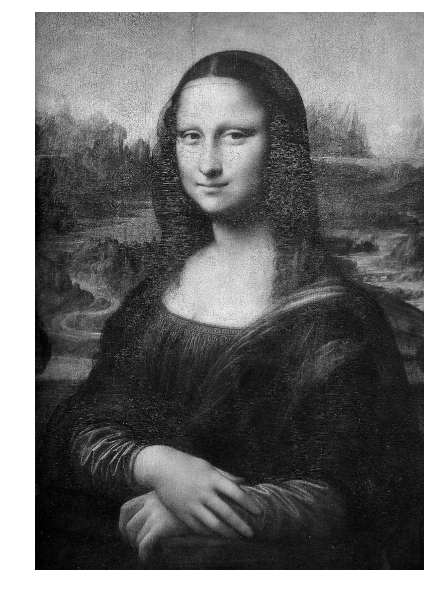

In [41]:
I_back = getImageFromPatches( patches , ratio)
plt.imshow(I_back, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

### PCA with sklearn

(2223L, 400L)
(2223L, 1L)
56
39


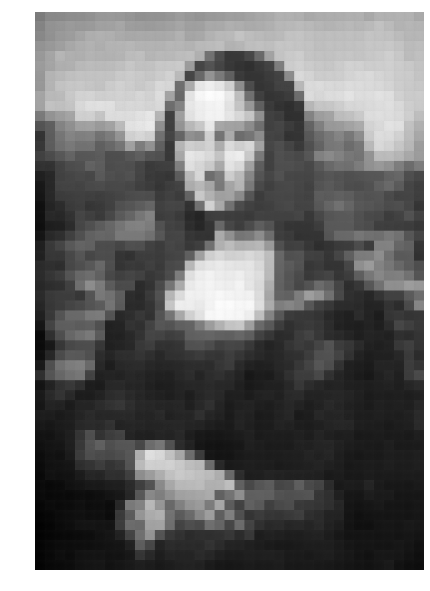

(1143L, 800L)
(1120L, 780L)


In [7]:
from sklearn.decomposition import FastICA, PCA

print patches.shape
pca = PCA(n_components = 1)
pca.fit(patches)
patches_pca = pca.fit_transform(patches)
print patches_pca.shape
patches_restored = pca.inverse_transform(patches_pca)

#coeff, score, latent = princomp(A,numpc)

I_back = getImageFromPatches( patches_restored , ratio)
plt.imshow(I_back, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

print I.shape
print I_back.shape

# load images

In [11]:
images = idx2numpy.convert_from_file(open('train-images.idx3-ubyte', 'rb'))
labels = idx2numpy.convert_from_file(open('train-labels.idx1-ubyte', 'rb'))

# load samples

In [12]:
def Show(n):
    print "NUMBER"
    print labels[n]
    plt.imshow(images[n], cmap=plt.cm.gray)
    plt.axis('off')
    plt.show()
    

NUMBER
2


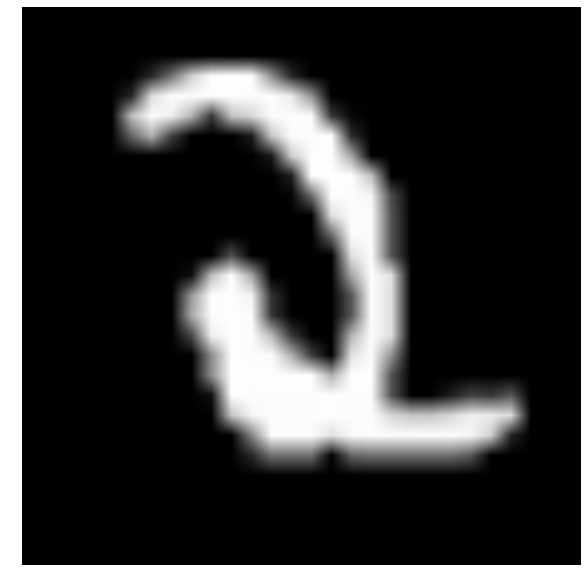

image size (28L, 28L)


In [13]:
Show(400)

print "image size %s" %(str(images[400].shape))

# convert images to patches

In [14]:
images_patches = []
for p in images:
    images_patches.append( getVectorPatches(p, 4) )


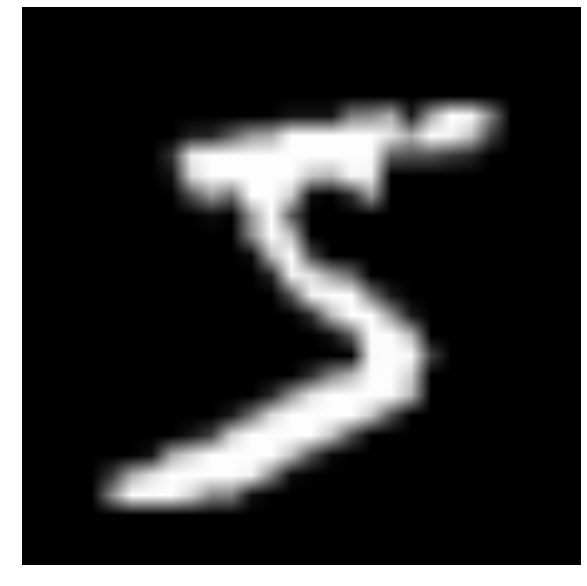

6
6


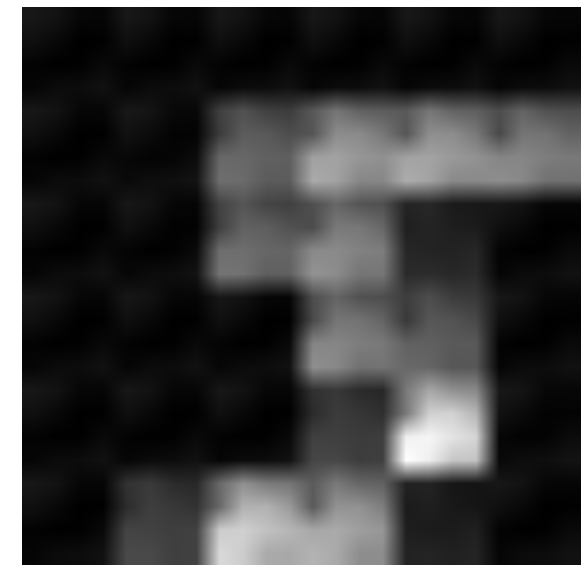

[[-182.11640253]
 [-182.11640253]
 [-182.11640253]
 [-182.11640253]
 [-182.11640253]
 [-182.11640253]
 [-182.11640253]
 [-170.72883262]
 [ 181.04814096]
 [ 386.50068886]
 [ 395.7463018 ]
 [ 288.35956752]
 [-182.11640253]
 [-179.01128232]
 [ 203.3821923 ]
 [ 304.94423495]
 [ -57.40096668]
 [-182.11640253]
 [-182.11640253]
 [-182.11640253]
 [-180.21882907]
 [ 289.8253167 ]
 [ 157.55170341]
 [-182.11640253]
 [-182.11640253]
 [-182.11640253]
 [-182.11640253]
 [  40.2112276 ]
 [ 678.60478515]
 [-172.68574019]
 [-182.11640253]
 [  51.77640472]
 [ 547.6362879 ]
 [ 415.15551044]
 [ -84.71786847]
 [-182.11640253]]


In [15]:
plt.imshow(images[0], cmap=plt.cm.gray)
plt.axis('off')
plt.show()

pca = PCA(n_components = 1)
pca.fit(images_patches[0])
test_pca = pca.fit_transform(images_patches[0])
test_restored = pca.inverse_transform(test_pca)

#coeff, score, latent = princomp(A,numpc)
ratio = float( images[0].shape[0]) / float( images[0].shape[1])
I_back = getImageFromPatches( test_restored , ratio)
plt.imshow(I_back, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

print test_pca

In [83]:
# todo: try with eigenvectors
n_comp = 1
def getFeature( image_patches ):
    pca = PCA(n_components = n_comp)
    pca.fit(image_patches)
    image_patches_pca = pca.fit_transform(image_patches)
#     print image_patches_pca
#     return image_patches_pca
    result = []
    for x in image_patches_pca:
        for xx in x:
            result.append( xx + 1000)
    return result

print 
print (getFeature(images_patches[0]))


[817.88359747285062, 817.88359747285097, 817.88359747285097, 817.88359747285062, 817.88359747285085, 817.88359747285085, 817.88359747285085, 829.27116737504014, 1181.0481409629713, 1386.5006888581675, 1395.7463017977302, 1288.3595675247075, 817.88359747285085, 820.98871768052663, 1203.3821923023734, 1304.944234947317, 942.59903331773467, 817.88359747285085, 817.88359747285085, 817.88359747285085, 819.7811709330972, 1289.825316699616, 1157.5517034128654, 817.88359747285085, 817.88359747285085, 817.88359747285085, 817.88359747285085, 1040.211227599204, 1678.6047851513099, 827.3142598058048, 817.88359747285085, 1051.7764047244732, 1547.6362878963478, 1415.1555104444542, 915.2821315277962, 817.88359747285085]


# compute all features

In [84]:
features = []
for i in images_patches:
    features.append( getFeature(i) )

# machine learning

In [85]:
print len(features)
print len(labels)
 
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.1)

60000
60000


In [86]:
print X_train[0]

[690.99819397181113, 690.99819397181, 972.5661337515287, 718.17741058056549, 690.99819397181068, 690.99819397181045, 690.99819397181045, 736.58009327108414, 1665.201673712128, 991.03395736310756, 690.99819397181034, 690.99819397181034, 690.99819397181034, 942.18553686997461, 1635.6992801211481, 743.45499896507658, 841.6522588208702, 1080.0806167331948, 690.99819397181045, 1021.8915628221908, 1406.0684009754721, 943.35098801915206, 1628.0980876130559, 1575.1589473141566, 690.99819397181045, 796.75948021907027, 1504.9625790081432, 1612.5022413826989, 1534.0292292024851, 1598.0795782198006, 690.99819397181045, 690.99819397181045, 732.09589424937485, 1078.8282559969848, 1154.7336484319321, 794.8308186950776]


In [87]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, Y_train)
classifier.score(X_test, Y_test)

0.75816666666666666

label: 4
classifier predict: 4
image source:


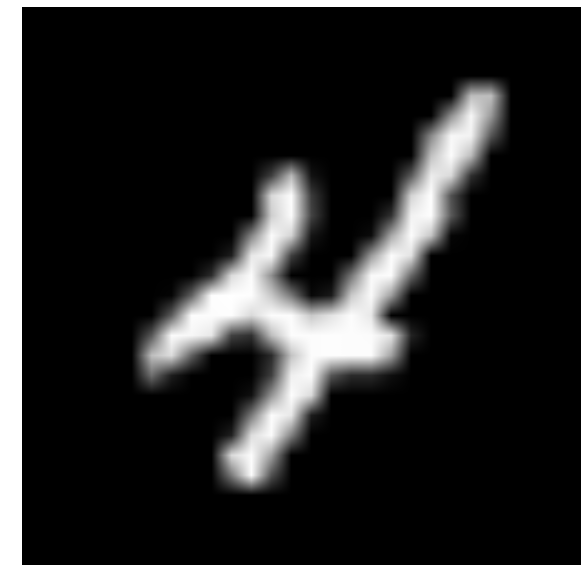

In [88]:
i = 9
print "label: %s"%labels[i]
print "classifier predict: %s" %classifier.predict( (getFeature(images_patches[i])) )[0]
print "image source:"
plt.imshow(images[i], cmap=plt.cm.gray)
plt.axis('off')
plt.show()

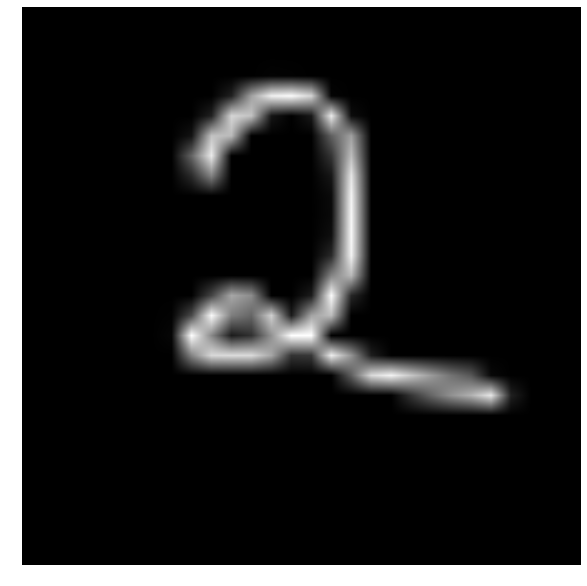

(28L, 28L)
classifier predict: 2


In [92]:
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

I = loadImageToMatrix('test_2.jpg')
I = rgb2gray(I)
plt.imshow(I, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

print I.shape

feature = getFeature( getVectorPatches( I , 4) )
print "classifier predict: %s" %classifier.predict( feature )[0]

# ICA

In [ ]:
from sklearn.decomposition import FastICA
# todo: try with eigenvectors
n_comp = 1
def getFeatureICA( image_patches ):
    pca = FastICA(n_components = n_comp)
    pca.fit(image_patches)
    image_patches_pca = pca.fit_transform(image_patches)
#     print image_patches_pca
#     return image_patches_pca
    result = []
    for x in image_patches_pca:
        for xx in x:
            result.append( xx + 1000)
    return result

print 
print (getFeature(images_patches[0]))


featuresICA = []
for i in images_patches:
    featuresICA.append( getFeatureICA(i) )

C:\Anaconda\lib\site-packages\sklearn\decomposition\fastica_.py:299: DeprecationWarning: Implicitly casting between incompatible kinds. In a future numpy release, this will raise an error. Use casting="unsafe" if this is intentional.
  X -= X_mean[:, np.newaxis]
C:\Anaconda\lib\site-packages\sklearn\decomposition\fastica_.py:299: DeprecationWarning: Implicitly casting between incompatible kinds. In a future numpy release, this will raise an error. Use casting="unsafe" if this is intentional.
  X -= X_mean[:, np.newaxis]
C:\Anaconda\lib\site-packages\sklearn\decomposition\fastica_.py:299: DeprecationWarning: Implicitly casting between incompatible kinds. In a future numpy release, this will raise an error. Use casting="unsafe" if this is intentional.
  X -= X_mean[:, np.newaxis]
C:\Anaconda\lib\site-packages\sklearn\decomposition\fastica_.py:299: DeprecationWarning: Implicitly casting between incompatible kinds. In a future numpy release, this will raise an error. Use casting="unsafe" i

# other PCA
### http://www.janeriksolem.net/2009/01/pca-for-images-using-python.html

The main purposes of a principal component analysis are the analysis of data to identify patterns and finding patterns to reduce the dimensions of the dataset with minimal loss of information.

In [90]:
from numpy import mean,cov,cumsum,dot,linalg,size,flipud

def princomp(A,numpc=0):
    # computing eigenvalues and eigenvectors of covariance matrix
    M = (A-mean(A.T,axis=1)).T # subtract the mean (along columns)
    [latent,coeff] = linalg.eig(cov(M))
    p = size(coeff,axis=1)
    idx = argsort(latent) # sorting the eigenvalues
    idx = idx[::-1]       # in ascending order
    # sorting eigenvectors according to the sorted eigenvalues
    coeff = coeff[:,idx]
    latent = latent[idx] # sorting eigenvalues
    if numpc < p and numpc >= 0:
        coeff = coeff[:,range(numpc)] # cutting some PCs if needed
    score = dot(coeff.T,M) # projection of the data in the new space
    return coeff,score,latent

In [91]:
from pylab import imread,subplot,imshow,title,gray,figure,show,NullLocator
A = imread('MonaLisaBW.jpg') # load an image
A = I#mean(A,2) # to get a 2-D array
full_pc = size(A,axis=1) # numbers of all the principal components
i = 1
dist = []
for numpc in range(0,full_pc+10,10): # 0 10 20 ... full_pc
    coeff, score, latent = princomp(A,numpc)
    Ar = dot(coeff,score).T+mean(A,axis=0) # image reconstruction
    # difference in Frobenius norm
    dist.append(linalg.norm(A-Ar,'fro'))
    # showing the pics reconstructed with less than 50 PCs
    if numpc <= 50:
        ax = subplot(2,3,i,frame_on=False)
        ax.xaxis.set_major_locator(NullLocator()) # remove ticks
        ax.yaxis.set_major_locator(NullLocator())
        i += 1 
        imshow(flipud(Ar))
        title('PCs # '+str(numpc))
        gray()

figure()
imshow(flipud(A))
title('numpc FULL')
gray()
show()

NameError: global name 'argsort' is not defined

# trash

In [ ]:
from sklearn.decomposition import FastICA, PCA

# http://scikit-learn.org/stable/auto_examples/decomposition/plot_ica_blind_source_separation.html
# http://www2.kobe-u.ac.jp/~ozawasei/pub/sci01.pdf 
# http://www2.kobe-u.ac.jp/~ozawasei/pub/ijcnn99.pdf
n = 20

# Compute ICA
ica = FastICA(n_components=2)
S_ = ica.fit_transform(X)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

# We can `prove` that the ICA model applies by reverting the unmixing.
assert np.allclose(X, np.dot(S_, A_.T) + ica.mean_)

# For comparison, compute PCA
pca = PCA(n_components=3)
H = pca.fit_transform(pca)  # Reconstruct signals based on orthogonal components